In [1]:
from astroquery.simbad import Simbad
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import matplotlib.pyplot as plt
import sys

%matplotlib inline

/Users/katiemel/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Short

In [2]:
#Only string based array is star_names. Everything else should have zeros where there is a missing value

star_names = np.genfromtxt("short_star_names.txt", dtype='str', missing_values = ('--'), filling_values=(np.nan))
RV = np.genfromtxt("short_RVs.txt", missing_values = ('--'), filling_values=(np.nan))

newt_Ha = np.genfromtxt("Comparisons/short_Newton.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
newt_Ha_err = np.genfromtxt("Comparisons/short_Newton.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
ad_logRHK = np.genfromtxt("Comparisons/short_AstudilloDefru.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
ad_logRHK_err = np.genfromtxt("Comparisons/short_AstudilloDefru.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
ad_S = np.genfromtxt("Comparisons/short_AstudilloDefru.txt", usecols=[2], missing_values = ('--'), filling_values=(np.nan))
ad_S_err = np.genfromtxt("Comparisons/short_AstudilloDefru.txt", usecols=[3], missing_values = ('--'), filling_values=(np.nan))

all_k_flux = np.genfromtxt("short_photometry.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
all_k_err = np.genfromtxt("short_photometry.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
all_v_flux = np.genfromtxt("short_photometry.txt", usecols=[2], missing_values = ('--'), filling_values=(np.nan))
all_v_err = np.genfromtxt("short_photometry.txt", usecols=[3], missing_values = ('--'), filling_values=(np.nan))

h_alpha = np.genfromtxt("Results/short_halpha.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
h_alpha_err = np.genfromtxt("Results/short_halpha.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
s_index = np.genfromtxt("Results/short_cahk_s_rhk.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
s_index_err = np.genfromtxt("Results/short_cahk_s_rhk.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
rhk_prime_index = np.genfromtxt("Results/short_cahk_s_rhk.txt", usecols=[2], missing_values = ('--'), filling_values=(np.nan))
rhk_prime_index_err = np.genfromtxt("Results/short_cahk_s_rhk.txt", usecols=[3], missing_values = ('--'), filling_values=(np.nan))
"""
SiIII_flux = np.genfromtxt("uv_fluxes.txt", skip_header=2, usecols=[0], missing_values = ('--'), filling_values=(np.nan))
SiIII_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=2, usecols=[1], missing_values = ('--'), filling_values=(np.nan))
LyA_flux = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[2], missing_values = ('--'), filling_values=(np.nan))
LyA_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[3], missing_values = ('--'), filling_values=(np.nan))
SiII_flux = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[4], missing_values = ('--'), filling_values=(np.nan))
SiII_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[5], missing_values = ('--'), filling_values=(np.nan))
CII_flux =np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[6], missing_values = ('--'), filling_values=(np.nan))
CII_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[7], missing_values = ('--'), filling_values=(np.nan))
MgII_flux = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[8], missing_values = ('--'), filling_values=(np.nan))
MgII_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[9], missing_values = ('--'), filling_values=(np.nan))
SiIV_flux = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[10], missing_values = ('--'), filling_values=(np.nan))
SiIV_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[11], missing_values = ('--'), filling_values=(np.nan))
HeII_flux = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[12], missing_values = ('--'), filling_values=(np.nan))
HeII_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[13], missing_values = ('--'), filling_values=(np.nan))
CIV_flux = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[14], missing_values = ('--'), filling_values=(np.nan))
CIV_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[15], missing_values = ('--'), filling_values=(np.nan))
NV_flux = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[16], missing_values = ('--'), filling_values=(np.nan))
NV_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[17], missing_values = ('--'), filling_values=(np.nan))
EUV_flux = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[18], missing_values = ('--'), filling_values=(np.nan))

dists = np.genfromtxt("uv_fluxes.txt", skip_header=2, usecols=[19], missing_values = ('--'), filling_values=(np.nan)) #parsecs
radii = np.genfromtxt("uv_fluxes.txt", skip_header=2, usecols=[20], missing_values = ('--'), filling_values=(np.nan)) #solar radii
temps = np.genfromtxt("uv_fluxes.txt", skip_header=2, usecols=[21], missing_values = ('--'), filling_values=(np.nan)) #kelvin
"""
print(len(star_names))
print(len(newt_Ha))
#print(len(EUV_flux))
print(len(s_index))
print(len(ad_logRHK))

48
48
48
48


In [48]:
num_spectra_ha = []
num_spectra_s = []
num_spectra_logrhk = []
for star in star_names:
    ha = np.genfromtxt("Results/%s_spectra_halpha.txt" % star, usecols=[0])
    s = np.genfromtxt("Results/%s_spectra_cahk.txt" % star, usecols=[0])
    rhk = np.genfromtxt("Results/%s_spectra_cahk.txt" % star, usecols=[2])
    
    len_ha = len(ha[ha!=0])
    len_s = len(s[s!=0])
    len_rhk = len(rhk[rhk>0])
    
    num_spectra_ha.append(len_ha)
    num_spectra_s.append(len_s)
    num_spectra_logrhk.append(len_rhk)
    
print(len(num_spectra_ha))

48


In [49]:
all_names = ['star', 'RV', 'K', 'err_K', 'V', 'err_V',
             'H_alpha', 'H_alpha_err', 's', 's_err', 'rhk_prime', 'rhk_prime_err', 
             #'SiIII', 'SiIII_err', 'LyA', 'LyA_err','SiII', 'SiII_err', 
             #'CII', 'CII_err', 'MgII', 'MgII_err', 'SiIV', 'SiIV_err', 'HeII', 'HeII_err', 
             #'CIV', 'CIV_err', 'NV', 'NV_err', 'EUV', 'dist', 'radius', 'teff', 
             'newt_Ha', 'newt_Ha_err', 'ad_logRHK', 'ad_logRHK_err', 'ad_S', 'ad_S_err', 
             "num_spectra_ha", "num_spectra_s", "num_spectra_logrhk"]
data = Table({'star': star_names, 
              'RV': RV,
              'K': all_k_flux, 'err_K': all_k_err, 
              'V': all_v_flux, 'err_V': all_v_err, 
              'H_alpha': h_alpha, 'H_alpha_err': h_alpha_err,
              's': s_index, 's_err': s_index_err,
              'rhk_prime': rhk_prime_index, 'rhk_prime_err': rhk_prime_index_err,
              #'SiIII': SiII_flux, 'SiIII_err': SiII_flux_err,
              #'LyA': LyA_flux, 'LyA_err': LyA_flux_err,
              #'SiII': SiII_flux, 'SiII_err': SiII_flux_err,
              #'CII': CII_flux, 'CII_err': CII_flux_err,
              #'MgII': MgII_flux, 'MgII_err': MgII_flux_err,
              #'SiIV': SiIV_flux, 'SiIV_err': SiIV_flux_err,
              #'HeII': HeII_flux, 'HeII_err': HeII_flux_err,
              #'CIV': CIV_flux, 'CIV_err': CIV_flux_err,
              #'NV': NV_flux, 'NV_err': NV_flux_err,
              #'EUV': EUV_flux, 
              #'dist': dists, 'radius': radii, 'teff': temps, 
              'newt_Ha': newt_Ha, 'newt_Ha_err': newt_Ha_err, 
              'ad_logRHK': ad_logRHK, 'ad_logRHK_err': ad_logRHK_err, 
              'ad_S': ad_S, 'ad_S_err': ad_S_err,
              'num_spectra_ha': num_spectra_ha, 'num_spectra_s': num_spectra_s, 
              'num_spectra_logrhk': num_spectra_logrhk}, names=all_names)

In [18]:
uv_lines = ["SiIII", "LyA", "SiII", "CII", "MgII", "SiIV", "HeII", "CIV", "NV", "EUV"]

for line in uv_lines:
    #convert flux to luminosity for each line
    luminosities = data[line] * 4 * np.pi * np.array(data["dist"])**2 * 3e18**2
    data['%s_lum' % line] = luminosities

    #convert luminosity to surface flux for each star
    surface_flux = luminosities / (4 * np.pi * np.array(data["radius"])**2 * 6.96e10**2)
    data['%s_surface_flux' % line] = surface_flux
    
    #error analysis (different for EUV -- no errors provided so just 0)
    if line != "EUV":
        lum_err = data['%s_err' % line] * 4 * np.array(data["dist"])**2 * 3e18**2
        data['%s_lum_err' % line] = lum_err
        surface_flux_err = lum_err / (4 * np.pi * np.array(data["radius"])**2 * 6.96e10**2)
        data['%s_surface_flux_err' % line] = surface_flux_err
        
    else:
        data['%s_lum_err' % line] = np.zeros(len(star_names))
        data['%s_surface_flux_err' % line] = np.zeros(len(star_names))
        
#print(data["EUV_lum_err"])
#print(data["EUV_surface_flux_err"])

#print(data['s_err'][data['star']=='GJ176'])

KeyError: 'SiIII'

In [50]:
#print(data)
ascii.write(data, 'short_ALL_DATA.dat', overwrite=True)
#print(data['SiIII_lum'][data['star']=='GJ176']) #example of subsetting the data
#print(data['H_alpha'][data['star']=='K2-25'])

In [51]:
test = ascii.read("short_ALL_DATA.dat", fill_values=[("nan", 0.0)]) 
print(test.dtype.names)
#print(test)
#print(test["SiIII_lum"])
#print(test["num_spectra_logrhk"])

('star', 'RV', 'K', 'err_K', 'V', 'err_V', 'H_alpha', 'H_alpha_err', 's', 's_err', 'rhk_prime', 'rhk_prime_err', 'newt_Ha', 'newt_Ha_err', 'ad_logRHK', 'ad_logRHK_err', 'ad_S', 'ad_S_err', 'num_spectra_ha', 'num_spectra_s', 'num_spectra_logrhk')


## Make Table 1:

Targets, RV, **RV source**, V band, V err, **V sources**, K band, K err, **K sources**, **(same with all the UV fluxes**, number of spectra used, **spectra source(s), spectral type**

In [55]:
table1_names = ['star', 'RV', 'K', 'err_K', 'V', 'err_V',
             "spectra_ha", "spectra_s", "spectra_rhk"]
table1 = Table({'star': star_names, 
              'RV': RV,
              'K': all_k_flux, 'err_K': all_k_err, 
              'V': all_v_flux, 'err_V': all_v_err, 
              'spectra_ha': num_spectra_ha, 'spectra_s': num_spectra_s, 
              'spectra_rhk': num_spectra_logrhk}, names=table1_names)

ascii.write(table1, sys.stdout, format='latex')

\begin{table}
\begin{tabular}{ccccccccc}
star & RV & K & err_K & V & err_V & spectra_ha & spectra_s & spectra_rhk \\
GJ176 & 26.0 & 5.60699987411 & 0.0340000018477 & 9.95100021362 & 0.0 & 85 & 85 & 85 \\
GJ667C & 6.1 & 6.03599977493 & 0.019999999553 & 10.220000267 & 0.0 & 180 & 180 & 180 \\
GJ581 & -9.8 & 5.83699989319 & 0.0230000000447 & 10.5600004196 & 0.019999999553 & 26 & 26 & 26 \\
GJ1214 & 16.0 & 8.78199958801 & 0.019999999553 & 14.6700000763 & 0.0 & 95 & 94 & 93 \\
GJ832 & 12.8 & 4.50099992752 & 0.0179999992251 & 8.67199993134 & 0.0 & 62 & 62 & 62 \\
GJ876 & -2.1 & 5.01000022888 & 0.0209999997169 & 10.1920003891 & 0.00170000002254 & 200 & 200 & 200 \\
GJ436 & 10.0 & 6.07299995422 & 0.01600000076 & 10.6129999161 & 0.00999999977648 & 169 & 169 & 169 \\
GJ628 & -21.6 & 5.07499980927 & 0.0240000002086 & 10.0719995499 & 0.00209999992512 & 200 & 199 & 199 \\
GJ887 & 9.5 & 3.46000003815 & 0.20000000298 & 7.34000015259 & 0.0 & 198 & 189 & 187 \\
GJ1061 & 0.7 & 6.61000013351 & 0.02099999

### Long

In [119]:
#Only string based array is star_names. Everything else should have zeros where there is a missing value

star_names_full = np.genfromtxt("star_names.txt", dtype='str', missing_values = ('--'), filling_values=(np.nan))
RV_full = np.genfromtxt("RVs.txt", missing_values = ('--'), filling_values=(np.nan))

newt_Ha_full = np.genfromtxt("Comparisons/Newton.txt", usecols=[0], dtype="str", missing_values = ('--'), filling_values=(np.nan))
newt_Ha_err_full = np.genfromtxt("Comparisons/Newton.txt", usecols=[1], dtype="str", missing_values = ('--'), filling_values=(np.nan))
ad_logRHK_full = np.genfromtxt("Comparisons/AstudilloDefru.txt", usecols=[0], dtype="str", missing_values = ('--'), filling_values=(np.nan))
ad_logRHK_err_full = np.genfromtxt("Comparisons/AstudilloDefru.txt", usecols=[1], dtype="str", missing_values = ('--'), filling_values=(np.nan))
ad_S_full = np.genfromtxt("Comparisons/AstudilloDefru.txt", usecols=[2], dtype="str", missing_values = ('--'), filling_values=(np.nan))
ad_S_err_full = np.genfromtxt("Comparisons/AstudilloDefru.txt", usecols=[3], dtype="str", missing_values = ('--'), filling_values=(np.nan))

all_k_flux_full = np.genfromtxt("photometry.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
all_k_err_full = np.genfromtxt("photometry.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
all_v_flux_full = np.genfromtxt("photometry.txt", usecols=[2], missing_values = ('--'), filling_values=(np.nan))
all_v_err_full = np.genfromtxt("photometry.txt", usecols=[3], missing_values = ('--'), filling_values=(np.nan))

h_alpha_full = np.genfromtxt("Results/halpha.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
h_alpha_err_full = np.genfromtxt("Results/halpha.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
s_index_full = np.genfromtxt("Results/cahk_s_rhk.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
s_index_err_full = np.genfromtxt("Results/cahk_s_rhk.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
rhk_prime_index_full = np.genfromtxt("Results/cahk_s_rhk.txt", usecols=[2], missing_values = ('--'), filling_values=(np.nan))
rhk_prime_index_err_full = np.genfromtxt("Results/cahk_s_rhk.txt", usecols=[3], missing_values = ('--'), filling_values=(np.nan))

#print(len(star_names))
#print(len(newt_Ha))
#print(len(EUV_flux))
#print(len(s_index))

IOError: Results/halpha.txt not found.

In [118]:
#Eventually will make graphs with all matching Newton and Astudillo-Defru targets to compare
#Will need to mask values that don't exist in their tables AND values where RV is zero (calculations will be incorrect for these)

## Comparison Tests:

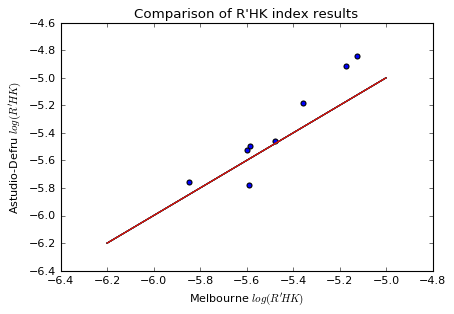

In [131]:
for i in range(len(test["ad_logRHK"])):
    value = test["ad_logRHK"][i]
    if value != 0.0:
        plt.scatter(np.log10(rhk_prime_index[i]), value)
        #plt.errorbar(my_rhk, ad_rhk, yerr=ad_rkh_err, linestyle="None")
    plt.plot(np.linspace(-5,-6.2),np.linspace(-5,-6.2))
    plt.title("Comparison of R'HK index results")
    plt.xlabel("Melbourne $log(R'HK)$")
    plt.ylabel("Astudio-Defru $log(R'HK)$")

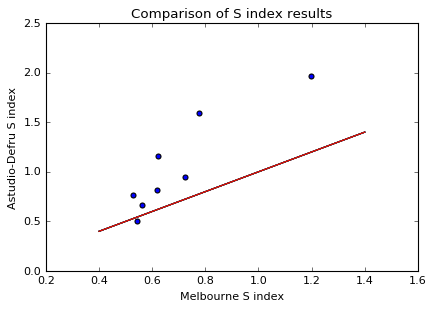

In [132]:
for i in range(len(test["s"])):
    value = test["ad_S"][i]
    if value != 0.0:
        plt.scatter(test["s"][i], value)
        #plt.errorbar(my_rhk, ad_rhk, yerr=ad_rkh_err, linestyle="None")
    plt.plot(np.linspace(0.4,1.4),np.linspace(0.4,1.4))
    plt.title("Comparison of S index results")
    plt.xlabel("Melbourne S index")
    plt.ylabel("Astudio-Defru S index")

#### Attempting to apply masks!!! See below!!! Much excite!!!

[ True False  True False  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True False  True False  True False
 False  True  True  True  True  True  True  True  True  True]
[-4.91099977 -5.77600002 -5.18200016 -5.49599981 -5.45699978 -5.52299976
 -4.84299994 -5.75400019 -5.25600004 -5.91499996 -5.61299992 -5.9380002
 -5.04400015 -4.19099998 -3.99499989 -5.00299978 -4.85699987 -4.07800007
 -4.75199986 -5.48000002 -5.296      -4.88500023 -5.69099998 -4.42799997
 -5.57399988 -4.59899998 -5.17799997]
[-5.1715236  -5.59033269 -5.35828109 -5.5862136  -5.47843544 -5.59599907
 -5.12274827 -5.84777979 -5.37323233 -5.72047647 -5.57088384 -5.27564415
 -5.55627409 -4.67670273 -4.33616115 -5.26507165 -5.16540425 -4.56052432
 -4.94855177 -5.51795624 -5.44403589 -5.22037486 -5.46955982 -4.80825658
 -5.62857938 -4.96690624         nan]


/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10


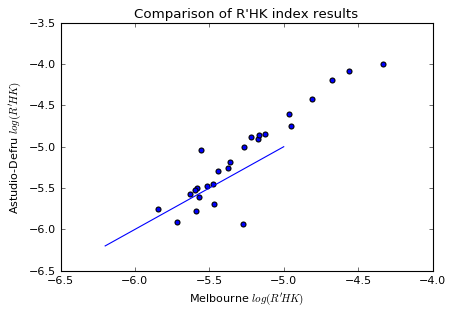

In [139]:
test = ascii.read("short_ALL_DATA.dat")#,fill_values=[(0.0, 'nan')]) 

bool_ad_logRHK = np.logical_and(test["ad_logRHK"] != 0.0, test["rhk_prime"] != 0)
print(bool_ad_logRHK)
ad_logRHK = np.array(test["ad_logRHK"])
print(ad_logRHK[bool_ad_logRHK])
print(np.log10(rhk_prime_index)[bool_ad_logRHK])

plt.scatter(np.log10(rhk_prime_index)[bool_ad_logRHK], ad_logRHK[bool_ad_logRHK])
#plt.errorbar(my_rhk, ad_rhk, yerr=ad_rkh_err, linestyle="None")
plt.plot(np.linspace(-5,-6.2),np.linspace(-5,-6.2))
plt.title("Comparison of R'HK index results")
plt.xlabel("Melbourne $log(R'HK)$")
plt.ylabel("Astudio-Defru $log(R'HK)$")

In [ ]:
#boolean_array = np.logical_and(RV_)